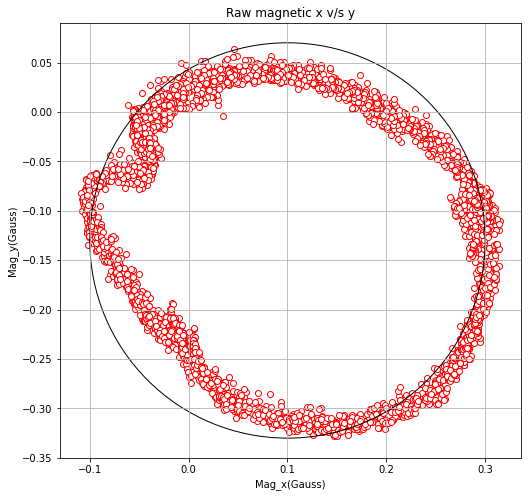

0.3151 0.0638 -0.1092 -0.3283


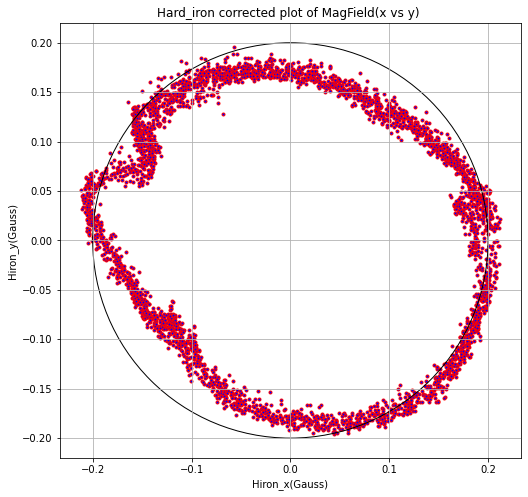

0.07305 0.14444999999999997
0.07305 0.14444999999999997
0.16187064279850127


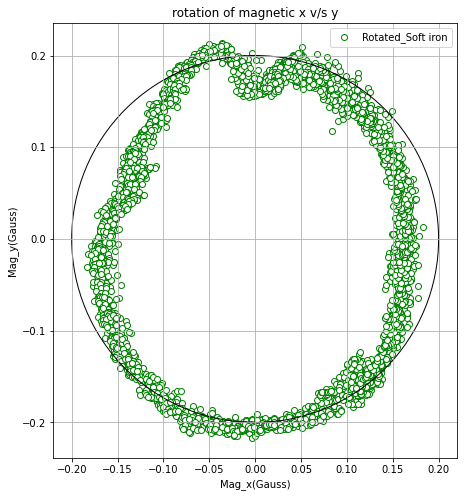

sigma=0.7499999999999999


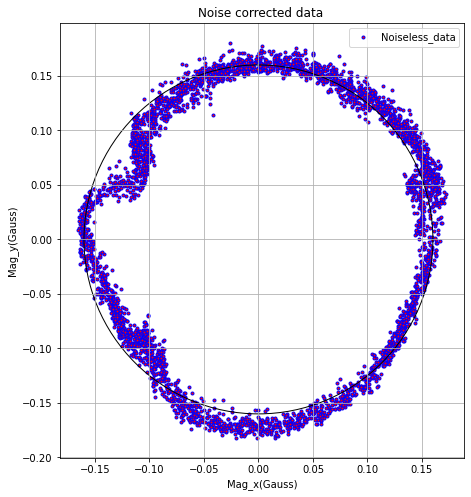

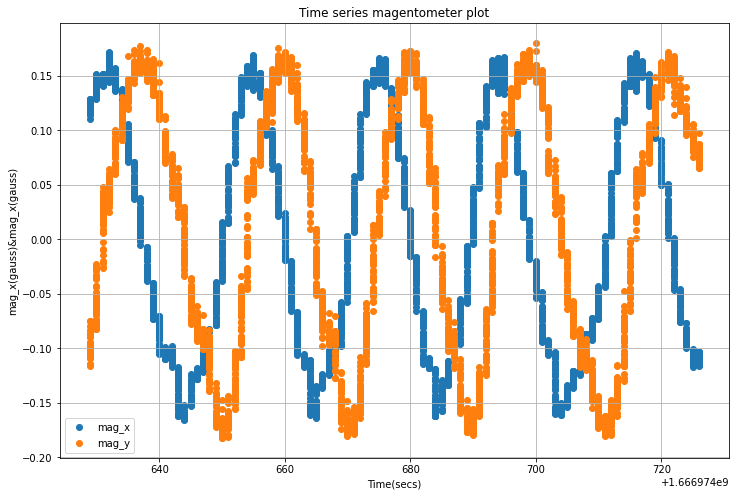

In [22]:
from mpl_toolkits import mplot3d
#import bagpy
#from bagpy import bagreader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#a=bagreader('/imu_1.bag')
#e = a.message_by_topic('/imu')

imudata = pd.read_csv('/content/drive/MyDrive/data_going_in_circles/imu.csv')


mag_x = imudata['MagField.magnetic_field.x']
mag_y = imudata['MagField.magnetic_field.y']
mag_z = imudata['MagField.magnetic_field.z']
time_sec = np.double(imudata['Header.stamp.secs'])
time_nsec = np.double(imudata['Header.stamp.nsecs'])*(10**9)
time = time_sec+time_nsec
plt.figure(figsize = (12,8))
plt.grid()
plt.scatter(mag_x, mag_y, marker="o",c='w',edgecolors='r')
mycircle = plt.Circle((0.1,-0.13),0.2, fill = False)

plt.gca().add_patch(mycircle) 
plt.gca().set_aspect("equal")
plt.title('Raw magnetic x v/s y')
plt.xlabel('Mag_x(Gauss)')
plt.ylabel('Mag_y(Gauss)')
plt.show()

#HardIron _correction
x_max = max(mag_x)
y_max = max(mag_y)
x_min = min(mag_x)
y_min = min(mag_y)

print(x_max,y_max, x_min, y_min )

alpha = (x_max+x_min)/2
beta = (y_max+y_min)/2

hiron_x = []
hiron_x.extend((mag_x-alpha))
hiron_y = []
hiron_y.extend((mag_y-beta))

plt.figure(figsize = (12,8))
plt.grid()
plt.scatter(hiron_x, hiron_y, marker=".",c='b',edgecolors='r')
mycircle = plt.Circle((0.0,0.0),0.2, fill = False)
plt.gca().add_patch(mycircle) 
plt.gca().set_aspect("equal")
plt.title("Hard_iron corrected plot of MagField(x vs y) ")
plt.xlabel("Hiron_x(Gauss)")
plt.ylabel("Hiron_y(Gauss)")
plt.show()
x1 = float(hiron_x[2000])
y1 = float(hiron_y[2000])
print(x1,y1)

#SOFT-IRON

x1 = float(hiron_x[2000])
y1 = float(hiron_y[2000])
print(x1,y1)

arry_hiron_x = np.array(hiron_x)
arry_hiron_y = np.array(hiron_y)

b1 = np.concatenate((arry_hiron_x, arry_hiron_y))

r = math.sqrt((x1**2) + (y1**2))
theta = np.arcsin(y1/r)
theta_d = (theta*(180/np.pi))
print(r)

#matrix generation
R = np.array([[np.cos(theta), np.sin(theta)],
     [-np.sin(theta), np.cos(theta)]])
b = np.array([[hiron_x, hiron_y]]) 
v1 = np.matmul(R, b)

plt.figure(figsize = (12,8))
plt.grid()
plt.scatter(v1[:,0], v1[:,1], marker="o",c='w',edgecolors='g', label='Rotated_Soft iron')
mycircle2 = plt.Circle((0,0),0.2, fill = False)
plt.gca().add_patch(mycircle2) 
plt.gca().set_aspect("equal") 
plt.title('rotation of magnetic x v/s y')
plt.xlabel('Mag_x(Gauss)')
plt.ylabel('Mag_y(Gauss)')
plt.legend()
plt.show()  


#scale factor

sigma = 0.15/0.2

print(f"sigma={sigma}")

# correction method

scale = np.array([[1, 0],
                 [0, sigma]])
correct_mag_x1 = scale @ v1

theta1 = -theta

R_cal = np.array([[np.cos(theta1), np.sin(theta1)],
      [-np.sin(theta1), np.cos(theta1)]])
v_cal = np.matmul(R_cal, correct_mag_x1)

plt.figure(figsize = (12,8))
plt.grid()
plt.scatter(v_cal[:,0], v_cal[:,1], marker=".",c='r',edgecolors='b', label ='Noiseless_data')
mycircle4 = plt.Circle((0,0),0.16, fill = False)
plt.gca().add_patch(mycircle4) 
plt.gca().set_aspect("equal") 
# plt.scatter(mag_x, mag_y, marker="o",c='w',edgecolors='r', label ='Raw_mag_data')
# mycircle3 = plt.Circle((0.1,-0.15),0.2, fill = False)
# plt.gca().add_patch(mycircle3) 
# plt.gca().set_aspect("equal") 
plt.title('Noise corrected data ')
plt.legend()
plt.xlabel('Mag_x(Gauss)')
plt.ylabel('Mag_y(Gauss)')
plt.show()  

plt.figure(figsize = (12,8))
plt.grid()
plt.scatter(time_sec, v_cal[:,0], label='mag_x')
plt.scatter(time_sec, v_cal[:,1], label='mag_y')
plt.legend()
plt.title("Time series magentometer plot")
plt.xlabel('Time(secs)')
plt.ylabel('mag_x(gauss)&mag_x(gauss)')
plt.show()

 
